<a href="https://colab.research.google.com/github/SDLSUNYPOLYTEAM3/RFID/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sdl(1).csv to sdl(1).csv


In [ ]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['sdl(1).csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
import numpy as np
with open("sdl(1).csv") as file_name :
  train_data = np.loadtxt(file_name, delimiter=",")

test_data = train_data
train_labels = train_data
test_labels = train_data
train_data = np.delete(train_data,slice(0,149,1),axis=0)
train_data = np.delete(train_data,slice(3,4,1),axis=1)
train_labels = np.delete(train_labels,slice(0,3,1),axis=1)
train_labels = np.delete(train_labels,slice(0,149,1),axis=0)
test_data = np.delete(test_data,slice(149,744,1),axis=0)
test_data = np.delete(test_data,slice(3,4,1),axis=1)
test_labels = np.delete(test_labels,slice(0,3,1),axis=1)
test_labels = np.delete(test_labels,slice(149,744,1),axis=0)

In [ ]:
x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels
x_train[0]

array([  7.,   5., 619.])

In [ ]:
len (x_train)

595

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.0025)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=7, batch_size=2)
results = model.evaluate(x_test, y_test)

Epoch 1/7
298/298 [==============================] - 1s 2ms/step - loss: 3.7817 - accuracy: 0.8370
Epoch 2/7
298/298 [==============================] - 0s 2ms/step - loss: 1.8134 - accuracy: 0.8639
Epoch 3/7
298/298 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.8891
Epoch 4/7
298/298 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.8908
Epoch 5/7
298/298 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.8655
Epoch 6/7
298/298 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.8807
Epoch 7/7
5/5 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.9799


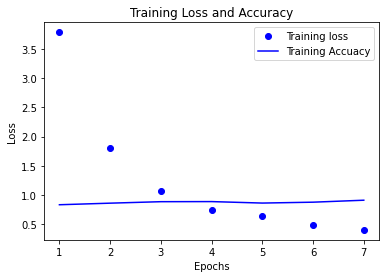

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Training Accuacy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
#saves as a keras file
keras_file = "learning1.h5"
tf.saved_model.save(model, "saved_model_keras_dir")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model1.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: saved_model_keras_dir/assets
INFO:tensorflow:Assets written to: /tmp/tmp5au564f5/assets
